# Combining Human & Mouse libraries

In [1]:
import numpy as np
import gffutils
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
from pegg import prime
import Bio.Seq

/Users/samgould/opt/anaconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
human = pd.read_csv('Human_tiling_library.csv')
mouse = pd.read_csv('Mouse_tiling_library.csv')

#adding information about whether gRNAs are dupliced as well
u, c= np.unique(human['proto_G+19'], return_counts=True)
dup_human = pd.DataFrame(dict(zip(['protospacer', 'count'],[u,c]))).sort_values(by='count', ascending=False)
dup_human['duplicated_guide'] = [True if i>1 else False for i in dup_human['count']]

for i, val in dup_human.iterrows():

    p = val['protospacer']
    c = val['count']
    d = val['duplicated_guide']

    human.loc[human['proto_G+19']==p, 'duplicated_guide'] = d
    human.loc[human['proto_G+19']==p, 'num_duplicates'] = c
  

In [29]:
#adding information about whether gRNAs are dupliced as well
u, c= np.unique(mouse['proto_G+19'], return_counts=True)
dup_mouse = pd.DataFrame(dict(zip(['protospacer', 'count'],[u,c]))).sort_values(by='count', ascending=False)
dup_mouse['duplicated_guide'] = [True if i>1 else False for i in dup_mouse['count']]

for i, val in dup_mouse.iterrows():

    p = val['protospacer']
    c = val['count']
    d = val['duplicated_guide']

    mouse.loc[mouse['proto_G+19']==p, 'duplicated_guide'] = d
    mouse.loc[mouse['proto_G+19']==p, 'num_duplicates'] = c

In [27]:
np.unique(human['duplicated_guide'], return_counts=True)

(array([False, True], dtype=object), array([31248,   945]))

In [30]:
np.unique(mouse['duplicated_guide'], return_counts=True)

(array([False, True], dtype=object), array([31174,  1114]))

In [39]:
merged = pd.concat((human, mouse)).reset_index(drop=True)

print(len(merged))
print(len(np.unique(merged['gRNA_id'])))
print(len(np.unique(merged['gRNA_oligo'])))
print(len(np.unique(merged['Hamming_BC'])))

print(len(np.unique(merged['proto_G+19'])))
print(len(np.unique(merged['sensor_wt'])))

print(np.unique([len(i) for i in merged['gRNA_oligo']]))

64481
64481
64481
64481
58866
62316
[250]


# Visualization

In [3]:
merged = pd.read_csv('Human_and_Mouse_tiling_libraries.csv')

In [47]:
list(merged[merged['Pool']=='F2-R6']['gRNA_oligo'])[0]

'GTGTAACCCGTAGGGCACCTAGCGTACACGTCTCACACCGTAGTTCATCCATTTCCTACGTTTAAGAGCTATGCTGGAAACAGCATAGCAAGTTTAAATAAGGCTAGTCCGTTATCAACTTGAAAAAGTGGCACCGAGTCGGTGCTTTTTTTGAGCCTGGAACTGTAGGAAATGGATGAACTAAGAAGCTTTGAGTCGTGTCTTTACGAATTCTAGATCCGGTCGTCAACCGTCACATTGGCGCTCGAGA'

In [ ]:
#merged[['gRNA_id', 'gRNA_oligo']].to_csv('Human_and_Mouse_tiling_libraries_OLIGOS_ONLY.csv', index=False)

In [27]:
p = []
gene = []
intron = []
nt = []
targeting = []
total_size = []
species = []

for i in np.unique(merged['Pool']):

    subset = merged[merged['Pool']==i]
    g =np.unique(subset[subset['classification']=='targeting']['Gene'])
    u, c = np.unique(subset['classification'], return_counts=True)
    d1 = dict(zip(u,c))

    intron.append(d1['intron'])
    nt.append(d1['non-targeting control'])
    targeting.append(d1['targeting'])

    p.append(i)
    gene.append(g[0])
    species.append(np.unique(subset[subset['classification']=='targeting']['species'])[0])
    total_size.append(len(subset))

pd.DataFrame(dict(zip(['Gene', 'Species', 'Pool', 'Total Size', 'Targeting gRNAs', 'Intron targeting gRNAs', 'Non-targeting gRNAs'],
                      [gene,species, p, total_size, targeting, intron, nt])))


,Gene,Species,Pool,Total Size,Targeting gRNAs,Intron targeting gRNAs,Non-targeting gRNAs
0,MEN1,Human,F1-R1,1263,1211,16,36
1,KDM6A,Human,F1-R2,2046,1930,55,61
2,KMT2A,Human,F1-R3,5852,5611,69,172
3,KMT2B,Human,F1-R4,5586,5357,66,163
4,KMT2C,Human,F1-R5,6934,6619,112,203
5,KMT2D,Human,F1-R6,10512,10103,102,307
6,Men1,Mouse,F2-R1,1155,1105,16,34
7,Kdm6a,Mouse,F2-R2,1984,1873,54,57
8,Kmt2a,Mouse,F2-R3,6445,6185,69,191
9,Kmt2b,Mouse,F2-R4,5135,4917,66,152


In [4]:
fgfr2_3b = pd.read_excel('2025_01_14_NG_Tiling_Libraries_YMSF_FSR.xlsx')
fgfr2_3b = fgfr2_3b[['Gene', 'Transcript ID', 'Protein']]

df = fgfr2_3b
df['species'] = ['Human']*6 + ['Mouse']*6
df

,Gene,Transcript ID,Protein,species
0,MEN1,ENST00000450708.7,MGLKAAQKTLFPLRSIDDVVRLFAAELGREEPDLVLLSLVLGFVEH...,Human
1,KDM6A,ENST00000611820.5,MKSCGVSLATAAAAAAAFGDEEKKMAAGKASGESEEASPSLTAEER...,Human
2,KMT2A,ENST00000534358.8,MAHSCRWRFPARPGTTGGGGGGGRRGLGGAPRQRVPALLLPPGPPV...,Human
3,KMT2B,ENST00000420124.4,MAAAAGGGSCPGPGSARGRFPGRPRGAGGGGGRGGRGNGAERVRVA...,Human
4,KMT2C,ENST00000262189.11,MSSEEDKSVEQPQPPPPPPEEPGAPAPSPAAADKRPRGRPRKDGAS...,Human
5,KMT2D,ENST00000301067.12,MDSQKLAGEDKDSEPAADGPAASEDPSATESDLPNPHVGEVSVLSS...,Human
6,Men1,ENSMUST00000113504.10,MGLKAAQKTLFPLRSIDDVVRLFAAELGREEPDLVLLSLVLGFVEH...,Mouse
7,Kdm6a,ENSMUST00000044484.13,MKSCGVSLATAAAAAAAAAFGDEEKKMAAGKASGESEEASPSLTAE...,Mouse
8,Kmt2a,ENSMUST00000002095.11,MAHSCRWRFPARPGTTGGGGGGGRRGLGGAPRQRVPALLLPPGPQA...,Mouse
9,Kmt2b,ENSMUST00000108154.9,MAAAAGGGSCPGPGSARGRFPGRPRGSGGGGGRGGRGNGAERVRVA...,Mouse


In [5]:

edit_holder = []
names = []
for i, val in df.iterrows():
    gene = val['Gene']
    names.append(gene)
    species = val['species']

    if species=='Human':
        d = pd.read_csv(f'predicted_edit_tables/human_{gene}_predicted_edits.csv')

    elif species=='Mouse':
        d = pd.read_csv(f'predicted_edit_tables/mouse_{gene}_predicted_edits.csv')
        
    edit_holder.append(d)
    #and drop the edits that aren't included because of filtering
    
edit_dict = dict(zip(names, edit_holder))

In [6]:
both_list = []
abe_list = []
cbe_list = []

for gene in edit_dict.keys():

    e = edit_dict[gene]
    e = e[(e['HGVSp']!= 'WT') & (e['Complex']==False)]
    both = len(np.unique(e['Codon']))
    abe_subset = len(np.unique(e[e['Editor']=='ABE']['Codon']))
    cbe_subset = len(np.unique(e[e['Editor']=='CBE']['Codon']))

    both_list.append(both)
    abe_list.append(abe_subset)
    cbe_list.append(cbe_subset)

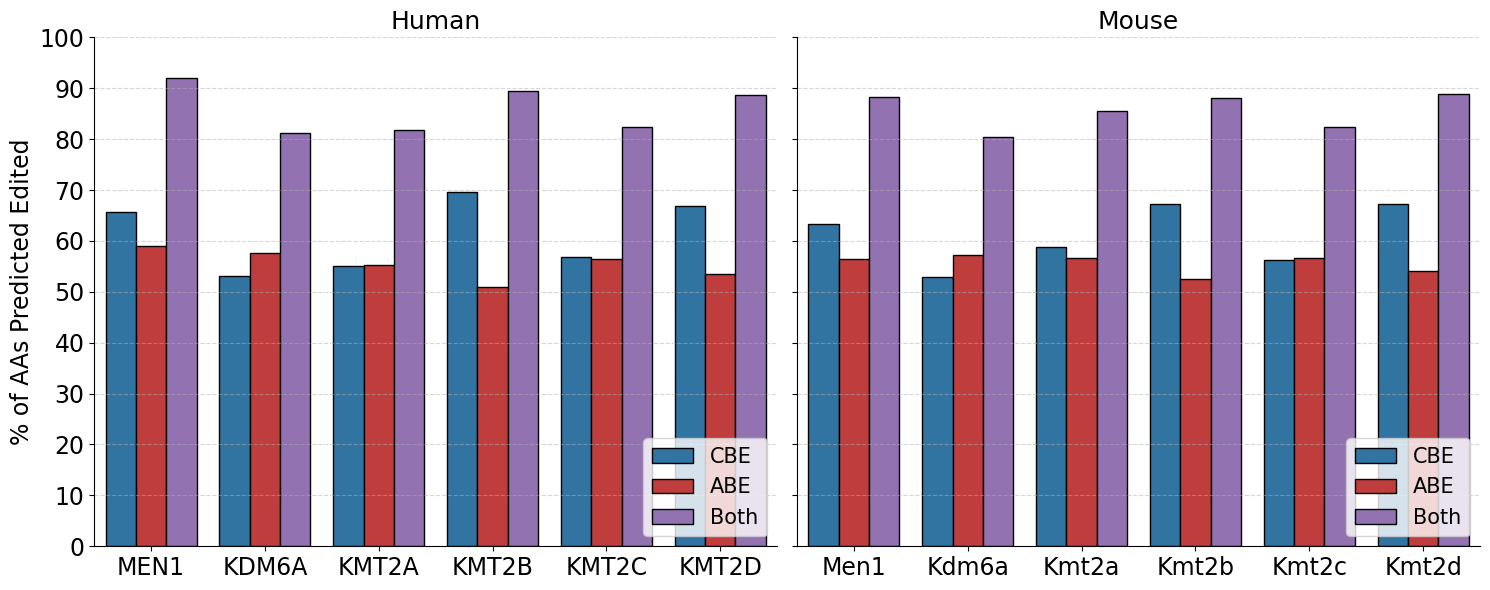

In [7]:
col_names = ['Gene', 'ABE', 'CBE', 'Both']
cols = [edit_dict.keys(), abe_list, cbe_list, both_list]
df2 = pd.DataFrame(dict(zip(col_names, cols)))

prot_lens = [len(i) for i in list(df['Protein'])]
prot_lens

df2['Protein_length'] = prot_lens


df2['ABE_frac'] = 100*df2['ABE']/df2['Protein_length']
df2['CBE_frac'] = 100*df2['CBE']/df2['Protein_length']
df2['Both_frac'] = 100*df2['Both']/df2['Protein_length']


col_names = ['Gene', 'Editor', 'Fraction Coverage']
cols1 = [list(df2['Gene']), 'ABE', list(df2['ABE_frac'])]
cols2 = [list(df2['Gene']), 'CBE', list(df2['CBE_frac'])]
cols3 = [list(df2['Gene']), 'Both', list(df2['Both_frac'])]

abe = pd.DataFrame(dict(zip(col_names, cols1)))
cbe = pd.DataFrame(dict(zip(col_names, cols2)))
both = pd.DataFrame(dict(zip(col_names, cols3)))

plotting_df = pd.concat((abe, cbe, both))

fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)

human_genes = names[:6]
mouse_genes = names[6:]

sns.barplot(data = plotting_df[plotting_df['Gene'].isin(human_genes)], x='Gene', y= 'Fraction Coverage', hue='Editor', linewidth=1, edgecolor='black',  hue_order = ['CBE', 'ABE', 'Both'], palette=['tab:blue', 'tab:red', 'tab:purple'], ax=ax[0])
sns.barplot(data = plotting_df[plotting_df['Gene'].isin(mouse_genes)], x='Gene', y= 'Fraction Coverage', hue='Editor', linewidth=1, edgecolor='black',  hue_order = ['CBE', 'ABE', 'Both'], palette=['tab:blue', 'tab:red', 'tab:purple'], ax=ax[1])


ax[0].tick_params(axis='both', which='major', labelsize=17)
ax[1].tick_params(axis='both', which='major', labelsize=17)

ax[0].set_ylabel('% of AAs Predicted Edited', fontsize=17)
ax[1].set_ylabel('')

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)

ax[0].legend(fontsize=15, loc='lower right')
ax[1].legend(fontsize=15, loc='lower right')
ax[0].set_ylim(0,100)
ax[0].set_yticks([0,10,20,30,40,50,60,70,80,90,100]);
ax[0].grid(axis='y', linestyle='dashed', alpha=.5)
ax[1].grid(axis='y', linestyle='dashed', alpha=.5)

ax[0].set_title('Human', fontsize=18)
ax[1].set_title('Mouse', fontsize=18)

fig.tight_layout()
#fig.savefig('figures/frac_editable.pdf')

In [73]:
def proto_viz(proto_df):
    abs_max = max(max(proto_df['end']), max(proto_df['start'])) - (min(proto_df['start'])-20)

    c = np.zeros(int(abs_max))

    plus = [c.copy()]
    minus = [c.copy()]

    for i, val in proto_df.iterrows():
        s = int(val['start']  - (min(proto_df['start'])-20))
        e = int(val['end']- (min(proto_df['start'])-20))
        strand = val['strand']

        num_pegs = 1

        if strand=='+':
            num_rows = len(plus)
            sum1 = []
            for i in range(num_rows):
                sum1.append(sum(plus[i][s:e]))

            open = []
            for k, val2 in enumerate(sum1):
                if val2==0:
                    open.append(k)
                else:
                    continue

            if len(open)==0: #add a new row
                newrow = c.copy()
                newrow[s:e]+=num_pegs
                plus.append(newrow)

            else: #otherwise, add to lowest existing row
                row_to_add = min(open)
                plus[row_to_add][s:e]+=num_pegs


        else: #minus
            s = int(val['end']- (min(proto_df['start'])-20))
            e = int(val['start']- (min(proto_df['start'])-20))

            num_rows = len(minus)
            sum1 = []
            for i in range(num_rows):
                sum1.append(sum(minus[i][s:e]))

            open = []
            for k, val2 in enumerate(sum1):
                if val2==0:
                    open.append(k)
                else:
                    continue

            if len(open)==0: #add a new row
                newrow = c.copy()
                newrow[s:e]+=num_pegs
                minus.append(newrow)

            else: #otherwise, add to lowest existing row
                row_to_add = min(open)
                minus[row_to_add][s:e]+=num_pegs


    #make them the same size
    for i in range(len(plus)-len(minus)):
        minus.append(c.copy())

    return plus, minus

# Human protospacer visualization

In [83]:
gene = human_genes[1]
#guides, edit_outcomes = mutation_simulator(gene, cdks, chrom_dict)

guides = merged[(merged['Gene']==gene) & (merged['classification']=='targeting')].copy()

#targ = combined_library_filtered[combined_library_filtered['classification']=='targeting']

#guides = targ[targ['Gene']==gene].reset_index()

proto_df = guides.rename(columns = {'proto_start':'start', 'proto_end':'end'})
plus, minus = proto_viz(proto_df)

In [84]:
#GRCh38 database
#loading in genome annotations
db = gffutils.FeatureDB('/Users/samgould/Desktop/FSR Lab/reference files/gencode_v44_GRCh38.db', keep_order=True)

#accessed genome annotations using gffutils package
#canonical MANE transcript for CDK9 (CDK9-201)
tx = 'ENST00000373264.5'


def tx_processor(tx):
    cds = list(db.children(tx, order_by='+end', featuretype=['CDS']))
    start_end_cds = [[i.start, i.end] for i in cds]
    strand = db[tx].strand
    chrom = db[tx].chrom
    #print(chrom[3:])
    #print(strand)
    #print(db[tx].attributes)

    #including 20 nt buffer on either side of exon for generating PAM sequences
    start_end_cds_20 = []
    buffer = 20
    for k in start_end_cds:
        h = []
        for idx, j in enumerate(k):
            if idx==0:
                h.append(j-buffer)
            if idx==1:
                h.append(j+buffer)
        start_end_cds_20.append(h)

    return start_end_cds_20, start_end_cds, chrom, strand

In [ ]:
tx = df.loc[df['Gene']==gene, 'Transcript ID'].values[0]
protein = df.loc[df['Gene']==gene, 'Protein'].values[0]

#--------check that it's the correct transcript and get the WT transcript sequence-------
start_end_cds_20, start_end_cds, chrom, strand = tx_processor(tx)

bounds = np.asarray(start_end_cds)- (min(proto_df['start'])-20)
bounds[:,1] =bounds[:,1]+40
bounds[:,0] =bounds[:,0]-40

wr = [i[1]-i[0] for i in bounds]
wr = [i/max(wr) for i in wr]

#plus, minus = proto_viz('num_pegRNAs')

#max_pegs = max(proto_df['num_pegRNAs'])
max_pegs = 1.5

fig, ax = plt.subplots(2,len(bounds), figsize=(20,3), width_ratios = wr)
#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, val in enumerate(bounds):
    g = sns.heatmap(plus[::-1], cmap='Blues', ax=ax[0][i], vmax = max_pegs, yticklabels=False, xticklabels=False, cbar=False)
    ax[0][i].hlines(list(range(len(plus)))[1:], *ax[0][i].get_xlim(), color='white')
    ax[0][i].set_xlim(val[0], val[1])

    g2 = sns.heatmap(minus, cmap='Blues', ax=ax[1][i], vmax=max_pegs, cbar=False, yticklabels=False,xticklabels=False, cbar_ax=None)
    ax[1][i].set_xlim(val[0], val[1])
    ax[1][i].hlines(list(range(len(minus)))[1:], *ax[1][i].get_xlim(), color='white')

    for _, spine in g.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)
    for _, spine in g2.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)

#ax[0][5].set_title('Number of pegRNAs per protospacer', fontsize=15)
plt.subplots_adjust(wspace=.05, hspace=.05)
fig.savefig(f'figures/human_{gene}_tiling.png', dpi=400)

KeyboardInterrupt: 